<a href="https://colab.research.google.com/github/analyticsariel/projects/blob/master/How_to_Get_Zillow_Property_Data_in%C2%A0Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Get Zillow Property Data in Python
<i>Python tutorial to get property data for on and off-market deals</i>

## Overview
| Detail Tag            | Information                                                                                        |
|-----------------------|----------------------------------------------------------------------------------------------------|
| Originally Created By | Ariel Herrera arielherrera@analyticsariel.com |
| External References   | API |
| Input Datasets        | Source name |
| Output Datasets       | Source name |
| Input Data Source     | Pandas DataFrame |
| Output Data Source    | Pandas DataFrame |

## History
| Date         | Developed By  | Reason                                                |
|--------------|---------------|-------------------------------------------------------|
| 20th May 2022 | Ariel Herrera | Create notebook. |

## Getting Started
1. Copy this notebook -> File -> Save a Copy in Drive
2. Directions
  - Get Free [Rapid API Key by creating an account](https://rapidapi.com/marketplace)
  - Store each key in a central and private location.
  - Subscribe to [Zillow on Rapid API](https://rapidapi.com/apimaker/api/zillow-com1/)

## Useful Resources
- [Google Colab Cheat Sheet](https://towardsdatascience.com/cheat-sheet-for-google-colab-63853778c093)

## <font color="blue">Install Packages</font>

In [ ]:
# !pip install googlesearch-python -q

## <font color="blue">Imports</font>

In [ ]:
from google.colab import drive, files # specific to Google Colab
from googlesearch import search # get zpid
import pandas as pd
import requests
import json
import time
import io
import plotly.express as px


# show all columns
pd.set_option('display.max_columns', None)

## <font color="blue">Functions</font>

In [ ]:
def get_zpid(street=None, city=None, state=None, zip_code=None, full_address=None):
  # get search query string
  if full_address == None:
    try:
      query = '{0}, {1}, {2} {3} zillow home details'.format(street, city, state, str(zip_code))
    except:
      return 'Please enter a query string or address details'
  else:
    query = full_address + ' zillow home details'

  # get google search results
  search_results = search(query, tld='com', lang='en', num=3, start=0, stop=1, pause=0)
  search_results_list = [u for u in search_results]
  url = search_results_list[0] # extract first returned result
  
  # return zpid
  try:
    return [x for x in url.split('/') if 'zpid' in x][0].split('_')[0]
  except:
    return None

In [ ]:
def get_property_detail(rapid_api_key, zpid):
  # get property details from API
  url = "https://zillow-com1.p.rapidapi.com/property"

  querystring = {"zpid":zpid} # zpid

  headers = {
    "X-RapidAPI-Host": "zillow-com1.p.rapidapi.com",
    "X-RapidAPI-Key": rapid_api_key # your key here
  }

  # request data
  return requests.request("GET", url, headers=headers, params=querystring)

## <font color="blue">Locals & Constants</font>

In [ ]:
############
# OPTIONAL #
############

# mount drive
drive.mount('/content/drive', force_remount=False)

# data location
file_dir = '/content/drive/My Drive/Colab Data/input/' # optional

Mounted at /content/drive


In [ ]:
# read in api key file
df_api_keys = pd.read_csv(file_dir + 'api_keys.csv')

# get keys
rapid_api_key = df_api_keys.loc[df_api_keys['API'] =='rapid']['KEY'].iloc[0] # replace this with your own key

## <font color="blue">Data</font>

### 1) Single Property


*   Get ZPID *(unique identifier for each property stored in the URL)*
*   Get Property Details Data



In [ ]:
# property address
property_address = "11622 Pure Pebble Dr, RIVERVIEW, FL 33569" # https://www.zillow.com/homedetails/11622-Pure-Pebble-Dr-Riverview-FL-33569/66718658_zpid/

# search query
query = property_address + ' zillow home details'
print('Search this phrase in Google Search:', query)

Search this phrase in Google Search: 11622 Pure Pebble Dr, RIVERVIEW, FL 33569 zillow home details


In [ ]:
# google search results
search_results = search(query, tld='com', lang='en', num=3, start=0, stop=3, pause=0)
search_results_list = [u for u in search_results] # get all results
search_results_list

['https://www.zillow.com/homedetails/11622-Pure-Pebble-Dr-Riverview-FL-33569/66718658_zpid/',
 'https://www.zillow.com/homedetails/11626-Pure-Pebble-Dr-Riverview-FL-33569/59915263_zpid/',
 'https://www.coldwellbankerhomes.com/fl/riverview/11622-pure-pebble-dr/pid_47199068/']

In [ ]:
# get the first search result
url = search_results_list[0] # extract first returned result
url

'https://www.zillow.com/homedetails/11622-Pure-Pebble-Dr-Riverview-FL-33569/66718658_zpid/'

In [ ]:
# extract the zpid
zpid = [x for x in url.split('/') if 'zpid' in x][0].split('_')[0]
print('Zpid of the property is:', zpid )

Zpid of the property is: 66718658


In [ ]:
# get property details from API
url = "https://zillow-com1.p.rapidapi.com/property"

querystring = {"zpid":zpid} # zpid

headers = {
	"X-RapidAPI-Host": "zillow-com1.p.rapidapi.com",
	"X-RapidAPI-Key": rapid_api_key # your key here
}

# request data
response = requests.request("GET", url, headers=headers, params=querystring)
# show success
response.status_code # 200 is success!

200

In [ ]:
response.json()

{'address': {'city': 'Riverview',
  'neighborhood': None,
  'state': 'FL',
  'streetAddress': '11622 Pure Pebble Dr',
  'zipcode': '33569'},
 'annualHomeownersInsurance': 2016,
 'bathrooms': 2,
 'bedrooms': 4,
 'brokerId': None,
 'brokerageName': 'Keller Williams Tampa Prop.',
 'building': None,
 'buildingPermits': None,
 'city': 'Riverview',
 'cityId': 6790,
 'comingSoonOnMarketDate': None,
 'contact_recipients': [{'agent_reason': 1,
   'badge_type': 'Premier Agent',
   'display_name': 'Steve Scott',
   'image_url': 'https://photos.zillowstatic.com/h_n/ISfo3zws3l499v1000000000.jpg',
   'phone': {'areacode': '813', 'number': '3633', 'prefix': '902'},
   'rating_average': 5,
   'recent_sales': 1,
   'review_count': 17,
   'zpro': None,
   'zuid': 'X1-ZU14g8dp89dtyix_9tzap'}],
 'contingentListingType': None,
 'country': 'USA',
 'county': None,
 'countyFIPS': '12057',
 'countyId': 3165,
 'currency': 'USD',
 'datePosted': '2022-05-20',
 'dateSold': '2018-01-22',
 'description': 'This 4 bed

In [ ]:
# transform data to pandas dataframe
df_property_detail = pd.json_normalize(data=response.json())
print('Num of rows:', len(df_property_detail))
print('Num of cols:', len(df_property_detail.columns))
df_property_detail.head()

Num of rows: 1
Num of cols: 259


,listingProvider,buildingPermits,propertyTaxRate,contact_recipients,longitude,countyFIPS,cityId,timeOnZillow,url,zestimate,imgSrc,zpid,zipcode,livingAreaValue,zestimateLowPercent,isListedByOwner,propertyTypeDimension,streetAddress,county,taxHistory,stateId,countyId,timeZone,homeType,livingAreaUnits,comingSoonOnMarketDate,livingArea,bathrooms,annualHomeownersInsurance,state,rentZestimate,building,brokerId,yearBuilt,brokerageName,dateSold,price,pageViewCount,description,homeStatus,homeFacts,latitude,datePosted,bedrooms,nearbyHomes,monthlyHoaFee,priceHistory,favoriteCount,schools,zestimateHighPercent,mlsid,city,providerListingID,country,currency,contingentListingType,solarPotential.sunScore,solarPotential.solarFactor,solarPotential.buildFactor,solarPotential.climateFactor,solarPotential.electricityFactor,resoFacts.hasAttachedProperty,resoFacts.frontageType,resoFacts.poolFeatures,resoFacts.flooring,resoFacts.foundationDetails,resoFacts.accessibilityFeatures,resoFacts.hasGarage,resoFacts.hasPetsAllowed,resoFacts.bodyType,resoFacts.topography,resoFacts.landLeaseExpirationDate,resoFacts.hasAdditionalParcels,resoFacts.waterViewYN,resoFacts.atAGlanceFacts,resoFacts.offerReviewDate,resoFacts.aboveGradeFinishedArea,resoFacts.view,resoFacts.buyerAgencyCompensationType,resoFacts.carportSpaces,resoFacts.cityRegion,resoFacts.mainLevelBathrooms,resoFacts.hasPrivatePool,resoFacts.associationFeeIncludes,resoFacts.waterSource,resoFacts.exteriorFeatures,resoFacts.coveredSpaces,resoFacts.inclusions,resoFacts.hasFireplace,resoFacts.zoningDescription,resoFacts.garageSpaces,resoFacts.sewer,resoFacts.elevationUnits,resoFacts.exclusions,resoFacts.mainLevelBedrooms,resoFacts.numberOfUnitsVacant,resoFacts.hasWaterfrontView,resoFacts.listAOR,resoFacts.lotSize,resoFacts.entryLevel,resoFacts.irrigationWaterRightsAcres,resoFacts.greenWaterConservation,resoFacts.stories,resoFacts.livingArea,resoFacts.numberOfUnitsInCommunity,resoFacts.listingTerms,resoFacts.otherStructures,resoFacts.associationFee,resoFacts.marketingType,resoFacts.greenIndoorAirQuality,resoFacts.greenSustainability,resoFacts.hasHomeWarranty,resoFacts.associationPhone,resoFacts.greenBuildingVerificationType,resoFacts.elementarySchool,resoFacts.bedrooms,resoFacts.architecturalStyle,resoFacts.listingId,resoFacts.structureType,resoFacts.interiorFeatures,resoFacts.horseAmenities,resoFacts.electric,resoFacts.developmentStatus,resoFacts.lotFeatures,resoFacts.roofType,resoFacts.waterSources,resoFacts.constructionMaterials,resoFacts.fireplaceFeatures,resoFacts.doorFeatures,resoFacts.appliances,resoFacts.daysOnZillow,resoFacts.bathroomsPartial,resoFacts.bathroomsHalf,resoFacts.depositsAndFees,resoFacts.canRaiseHorses,resoFacts.buildingName,resoFacts.hasAssociation,resoFacts.petsMaxWeight,resoFacts.commonWalls,resoFacts.totalActualRent,resoFacts.additionalParcelsDescription,resoFacts.associationName,resoFacts.allowedPets,resoFacts.communityFeatures,resoFacts.tenantPays,resoFacts.middleOrJuniorSchool,resoFacts.lotSizeDimensions,resoFacts.roadSurfaceType,resoFacts.hasOpenParking,resoFacts.yearBuilt,resoFacts.livingAreaRangeUnits,resoFacts.irrigationWaterRightsYN,resoFacts.bathroomsFull,resoFacts.horseYN,resoFacts.incomeIncludes,resoFacts.highSchool,resoFacts.leaseTerm,resoFacts.elevation,resoFacts.cropsIncludedYN,resoFacts.attic,resoFacts.subdivisionName,resoFacts.windowFeatures,resoFacts.ownership,resoFacts.woodedArea,resoFacts.middleOrJuniorSchoolDistrict,resoFacts.associationPhone2,resoFacts.buyerAgencyCompensation,resoFacts.heating,resoFacts.frontageLength,resoFacts.virtualTourURLUnbranded,resoFacts.associationAmenities,resoFacts.propertySubType,resoFacts.hasCooling,resoFacts.belowGradeFinishedArea,resoFacts.hasElectricOnProperty,resoFacts.foundationArea,resoFacts.zoning,resoFacts.hoaFee,resoFacts.livingAreaRange,resoFacts.basementYN,resoFacts.availabilityDate,resoFacts.waterBodyName,resoFacts.waterfrontFeatures,resoFacts.specialListingConditions,resoFacts.buildingAreaSource,resoFacts.taxAnnualAmount,

In [ ]:
# retrieve property detail elements
bedrooms = df_property_detail['bedrooms'].iloc[0]
bathrooms = df_property_detail['bathrooms'].iloc[0]
year_built = df_property_detail['yearBuilt'].iloc[0]
property_type = df_property_detail['homeType'].iloc[0]
living_area = df_property_detail['resoFacts.livingArea'].iloc[0]
lot_size = df_property_detail['resoFacts.lotSize'].iloc[0]
lot_dimensions = df_property_detail['resoFacts.lotSizeDimensions'].iloc[0]
zoning = df_property_detail['resoFacts.zoning'].iloc[0]
# estimates
zestimate = df_property_detail['zestimate'].iloc[0]
rent_zestimate = df_property_detail['rentZestimate'].iloc[0]

print('PROPERTY DETAILS FOR: ', property_address)
print('------------------------------------------------------------------')
print('  Bedrooms: {}'.format( bedrooms))
print('  Bathrooms: {}'.format( bathrooms))
print('  Year Built: {}'.format( year_built))
print('  Living Area: {}'.format( living_area))
print('  Lot Size: {}'.format( lot_size))
print('  Lot Dimensions: {}'.format( lot_dimensions))
print('  Zoning: {}'.format( zoning))
print('  Property Type: {}'.format( property_type))
print('  Zestimate: ${:,.0f}'.format( zestimate))
print('  Rent Zestimate: ${:,.0f}'.format( rent_zestimate))

PROPERTY DETAILS FOR:  11622 Pure Pebble Dr, RIVERVIEW, FL 33569
------------------------------------------------------------------
  Bedrooms: 4
  Bathrooms: 2
  Year Built: 2003
  Living Area: 2,079 sqft
  Lot Size: 6,534 sqft
  Lot Dimensions: 55 x 118
  Zoning: PD
  Property Type: SINGLE_FAMILY
  Zestimate: $443,600
  Rent Zestimate: $2,408


In [ ]:
# download file
df_property_detail.to_csv('output.csv', index=False)
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 2) List of Properties
*   Upload csv file
  * Check out [PropStream](https://trial.propstreampro.com/analyticsariel/) for on and off-market deals
*   Get ZPID *(unique identifier for each property stored in the URL)*
*   Get Property Details Data

In [ ]:
# upload document
# Ariel's example - PropStream Woodbridge Tax Liens (sample of 5 properties)
uploaded = files.upload()

Saving 202205 - Woodbridge Tax Liens Property Export All+Saved+Properties.csv to 202205 - Woodbridge Tax Liens Property Export All+Saved+Properties.csv


In [ ]:
# get file name
file_name = list(uploaded.keys())[0]

# read file
df_upload = pd.read_csv(io.BytesIO(uploaded[file_name]))
print('Num of rows:', len(df_upload))
df_upload.head()

Num of rows: 5


,Address,Unit #,City,State,Zip,County,APN,Owner Occupied,Owner 1 First Name,Owner 1 Last Name,Owner 2 First Name,Owner 2 Last Name,Mailing Care of Name,Mailing Address,Mailing Unit #,Mailing City,Mailing State,Mailing Zip,Mailing County,Do Not Mail,Property Type,Bedrooms,Total Bathrooms,Building Sqft,Lot Size Sqft,Effective Year Built,Total Assessed Value,Last Sale Recording Date,Last Sale Amount,Total Open Loans,Est. Remaining balance of Open Loans,Est. Value,Est. Loan-to-Value,Est. Equity,MLS Status,MLS Date,MLS Amount,Lien Amount,Marketing Lists,Date Added to List,Method of Add
0,43 Martin Ter,NaN,Woodbridge,NJ,7095,Middlesex,25 00552- 102-00004- 01,Yes,Kevin,Monroe,Doug,Wynn-Monroe,Kevin Monroe & Doug Wynn-Monroe,43 Martin Ter,NaN,Woodbridge,NJ,7095,NaN,NaN,Single Family Residential,2,2,896.0,NaN,1931,49400,10/18/19,245000,1,234487,321626,72.907,87139,REMOVED,2/5/21,245000,534.70,1,3/30/22,Manual
1,704 Cricket Ln,NaN,Woodbridge,NJ,7095,Middlesex,25 00252-0000-00100-0000-C0704,Yes,Mary,Mcguinn,NaN,NaN,Mary Mcguinn,704 Cricket Ln,NaN,Woodbridge,NJ,7095,NaN,NaN,Condominium (Residential),1,1,NaN,463.0,1981,35000,9/22/00,67500,2,37118,219756,16.891,182638,REMOVED,10/28/21,1650,19010.24,1,3/30/22,Manual
2,258 Columbus Ave,NaN,Woodbridge,NJ,7095,Middlesex,25 00263- 03-00015- 02,No,Eliezer,Placencia,NaN,NaN,Eliezer Placencia,438 Alpine St,NaN,Perth Amboy,NJ,8861,NaN,NaN,Single Family Residential,4,3,694.0,NaN,1935,48100,10/29/18,117000,0,0,312359,0.000,312359,REMOVED,3/2/22,549999,3529.41,1,3/30/22,Manual
3,164 Freeman St,NaN,Woodbridge,NJ,7095,Middlesex,25 00570-0000-00013- 02,Yes,Bruce,Laraque,NaN,NaN,Bruce Laraque,164 Freeman St,NaN,Woodbridge,NJ,7095,NaN,NaN,Single Family Residential,3,2,1432.0,NaN,1916,67300,10/4/05,80000,1,169014,276184,61.196,107170,ACTIVE,3/6/22,335000,267.35,1,3/30/22,Manual
4,615 Ridgewood Ave,NaN,Woodbridge,NJ,7095,Middlesex,25 00566- 03-00013- 04,No,Shirley,Gonzalez,NaN,NaN,Shirley Gonzalez,301 Saint Marks Ave,NaN,Piscataway,NJ,8854,NaN,NaN,Single Family Residential,3,2,1512.0,NaN,1958,76100,9/21/05,272000,1,166658,438303,38.023,271645,REMOVED,3/12/22,350000,385.43,1,3/30/22,Manual


In [ ]:
# create empty list to store api response for property details
df_list = []
zpid_list = []

# iterate through dataframe
for index, row in df_upload.iterrows():
  # get property address attributes by column name
  street = row['Address']
  city = row['City']
  state = row['State']
  zip_code = "0" + str(row['Zip']) # fix issue with zip code

  # get zpid
  zpid = get_zpid(street=street, city=city, state=state, zip_code=zip_code)
  zpid_list.append(zpid)

  # wait 1 second to not overload Google Search
  time.sleep(1.5)

  # get property details
  # catch errors (possibly no zpid)
  try:
    response = get_property_detail(rapid_api_key, zpid)
    _df = pd.json_normalize(data=response.json())
    # append data to list of property details
    df_list.append(_df)
  except:
    print('Unable to retrieve data for : {0}, {1}, {2}, {3}'.format(street, city, state, zip_code))

In [ ]:
# join property details data
df_prop_detail = pd.concat(df_list)
df_prop_detail.head()

,buildingPermits,propertyTaxRate,contact_recipients,longitude,countyFIPS,cityId,timeOnZillow,url,zestimate,imgSrc,zpid,zipcode,livingAreaValue,zestimateLowPercent,isListedByOwner,propertyTypeDimension,streetAddress,county,taxHistory,stateId,countyId,timeZone,homeType,livingAreaUnits,comingSoonOnMarketDate,livingArea,bathrooms,annualHomeownersInsurance,state,rentZestimate,building,brokerId,yearBuilt,brokerageName,dateSold,price,pageViewCount,description,homeStatus,homeFacts,latitude,datePosted,bedrooms,nearbyHomes,monthlyHoaFee,priceHistory,favoriteCount,schools,zestimateHighPercent,mlsid,city,providerListingID,country,currency,contingentListingType,listingProvider.enhancedVideoURL,listingProvider.showNoContactInfoMessage,listingProvider.postingGroupName,listingProvider.isZRMSourceText,listingProvider.showLogos,listingProvider.disclaimerText,listingProvider.sourceText,listingProvider.title,listingProvider.postingWebsiteURL,listingProvider.agentLicenseNumber,listingProvider.postingWebsiteLinkText,listingProvider.enhancedDescriptionText,listingProvider.agentName,solarPotential.sunScore,solarPotential.solarFactor,solarPotential.buildFactor,solarPotential.climateFactor,solarPotential.electricityFactor,resoFacts.hasAttachedProperty,resoFacts.frontageType,resoFacts.poolFeatures,resoFacts.flooring,resoFacts.accessibilityFeatures,resoFacts.hasGarage,resoFacts.hasPetsAllowed,resoFacts.bodyType,resoFacts.topography,resoFacts.landLeaseExpirationDate,resoFacts.hasAdditionalParcels,resoFacts.waterViewYN,resoFacts.atAGlanceFacts,resoFacts.offerReviewDate,resoFacts.aboveGradeFinishedArea,resoFacts.buyerAgencyCompensationType,resoFacts.rooms,resoFacts.carportSpaces,resoFacts.cityRegion,resoFacts.mainLevelBathrooms,resoFacts.hasPrivatePool,resoFacts.associationFeeIncludes,resoFacts.waterSource,resoFacts.exteriorFeatures,resoFacts.coveredSpaces,resoFacts.inclusions,resoFacts.hasFireplace,resoFacts.zoningDescription,resoFacts.garageSpaces,resoFacts.sewer,resoFacts.elevationUnits,resoFacts.exclusions,resoFacts.mainLevelBedrooms,resoFacts.numberOfUnitsVacant,resoFacts.hasWaterfrontView,resoFacts.listAOR,resoFacts.lotSize,resoFacts.entryLevel,resoFacts.irrigationWaterRightsAcres,resoFacts.greenWaterConservation,resoFacts.stories,resoFacts.livingArea,resoFacts.numberOfUnitsInCommunity,resoFacts.listingTerms,resoFacts.otherStructures,resoFacts.associationFee,resoFacts.marketingType,resoFacts.greenIndoorAirQuality,resoFacts.greenSustainability,resoFacts.hasHomeWarranty,resoFacts.associationPhone,resoFacts.greenBuildingVerificationType,resoFacts.elementarySchool,resoFacts.bedrooms,resoFacts.architecturalStyle,resoFacts.listingId,resoFacts.structureType,resoFacts.interiorFeatures,resoFacts.horseAmenities,resoFacts.electric,resoFacts.developmentStatus,resoFacts.lotFeatures,resoFacts.roofType,resoFacts.waterSources,resoFacts.fireplaceFeatures,resoFacts.doorFeatures,resoFacts.appliances,resoFacts.daysOnZillow,resoFacts.bathroomsPartial,resoFacts.bathroomsHalf,resoFacts.depositsAndFees,resoFacts.canRaiseHorses,resoFacts.buildingName,resoFacts.hasAssociation,resoFacts.petsMaxWeight,resoFacts.commonWalls,resoFacts.totalActualRent,resoFacts.additionalParcelsDescription,resoFacts.associationName,resoFacts.allowedPets,resoFacts.tenantPays,resoFacts.middleOrJuniorSchool,resoFacts.lotSizeDimensions,resoFacts.roadSurfaceType,resoFacts.hasOpenParking,resoFacts.yearBuilt,resoFacts.livingAreaRangeUnits,resoFacts.irrigationWaterRightsYN,resoFacts.bathroomsFull,resoFacts.horseYN,resoFacts.incomeIncludes,resoFacts.highSchool,resoFacts.leaseTerm,resoFacts.elevation,resoFacts.cropsIncludedYN,resoFacts.attic,resoFacts.subdivisionName,resoFacts.windowFeatures,resoFacts.ownership,resoFacts.woodedArea,resoFacts.middleOrJuniorSchoolDistrict,resoFacts.associationPhone2,resoFacts.buyerAgencyCompensation,resoFacts.heating,resoFacts.frontageLength,resoFacts.virtualTourURLUnbranded,resoFacts.associationAmenities,resoFacts.propertySubType,resoFacts.hasCooling,resoFacts.belowGradeFinis

In [ ]:
# join original dataset to property details
# create new column for zpid
df_upload['zpid'] = zpid_list

# confirm zpid is <str> type
df_upload['zpid'] = df_upload['zpid'].astype(str)
df_prop_detail['zpid'] = df_prop_detail['zpid'].astype(str)

# join on zpid
df_join = pd.merge(df_upload, df_prop_detail, how='left', on='zpid')
print('Num of columns:', len(df_join.columns))
df_join.head()

Num of columns: 313


,Address,Unit #,City,State,Zip,County,APN,Owner Occupied,Owner 1 First Name,Owner 1 Last Name,Owner 2 First Name,Owner 2 Last Name,Mailing Care of Name,Mailing Address,Mailing Unit #,Mailing City,Mailing State,Mailing Zip,Mailing County,Do Not Mail,Property Type,Bedrooms,Total Bathrooms,Building Sqft,Lot Size Sqft,Effective Year Built,Total Assessed Value,Last Sale Recording Date,Last Sale Amount,Total Open Loans,Est. Remaining balance of Open Loans,Est. Value,Est. Loan-to-Value,Est. Equity,MLS Status,MLS Date,MLS Amount,Lien Amount,Marketing Lists,Date Added to List,Method of Add,zpid,buildingPermits,propertyTaxRate,contact_recipients,longitude,countyFIPS,cityId,timeOnZillow,url,zestimate,imgSrc,zipcode,livingAreaValue,zestimateLowPercent,isListedByOwner,propertyTypeDimension,streetAddress,county,taxHistory,stateId,countyId,timeZone,homeType,livingAreaUnits,comingSoonOnMarketDate,livingArea,bathrooms,annualHomeownersInsurance,state,rentZestimate,building,brokerId,yearBuilt,brokerageName,dateSold,price,pageViewCount,description,homeStatus,homeFacts,latitude,datePosted,bedrooms,nearbyHomes,monthlyHoaFee,priceHistory,favoriteCount,schools,zestimateHighPercent,mlsid,city,providerListingID,country,currency,contingentListingType,listingProvider.enhancedVideoURL,listingProvider.showNoContactInfoMessage,listingProvider.postingGroupName,listingProvider.isZRMSourceText,listingProvider.showLogos,listingProvider.disclaimerText,listingProvider.sourceText,listingProvider.title,listingProvider.postingWebsiteURL,listingProvider.agentLicenseNumber,listingProvider.postingWebsiteLinkText,listingProvider.enhancedDescriptionText,listingProvider.agentName,solarPotential.sunScore,solarPotential.solarFactor,solarPotential.buildFactor,solarPotential.climateFactor,solarPotential.electricityFactor,resoFacts.hasAttachedProperty,resoFacts.frontageType,resoFacts.poolFeatures,resoFacts.flooring,resoFacts.accessibilityFeatures,resoFacts.hasGarage,resoFacts.hasPetsAllowed,resoFacts.bodyType,resoFacts.topography,resoFacts.landLeaseExpirationDate,resoFacts.hasAdditionalParcels,resoFacts.waterViewYN,resoFacts.atAGlanceFacts,resoFacts.offerReviewDate,resoFacts.aboveGradeFinishedArea,resoFacts.buyerAgencyCompensationType,resoFacts.rooms,resoFacts.carportSpaces,resoFacts.cityRegion,resoFacts.mainLevelBathrooms,resoFacts.hasPrivatePool,resoFacts.associationFeeIncludes,resoFacts.waterSource,resoFacts.exteriorFeatures,resoFacts.coveredSpaces,resoFacts.inclusions,resoFacts.hasFireplace,resoFacts.zoningDescription,resoFacts.garageSpaces,resoFacts.sewer,resoFacts.elevationUnits,resoFacts.exclusions,resoFacts.mainLevelBedrooms,resoFacts.numberOfUnitsVacant,resoFacts.hasWaterfrontView,resoFacts.listAOR,resoFacts.lotSize,resoFacts.entryLevel,resoFacts.irrigationWaterRightsAcres,resoFacts.greenWaterConservation,resoFacts.stories,resoFacts.livingArea,resoFacts.numberOfUnitsInCommunity,resoFacts.listingTerms,resoFacts.otherStructures,resoFacts.associationFee,resoFacts.marketingType,resoFacts.greenIndoorAirQuality,resoFacts.greenSustainability,resoFacts.hasHomeWarranty,resoFacts.associationPhone,resoFacts.greenBuildingVerificationType,resoFacts.elementarySchool,resoFacts.bedrooms,resoFacts.architecturalStyle,resoFacts.listingId,resoFacts.structureType,resoFacts.interiorFeatures,resoFacts.horseAmenities,resoFacts.electric,resoFacts.developmentStatus,resoFacts.lotFeatures,resoFacts.roofType,resoFacts.waterSources,resoFacts.fireplaceFeatures,resoFacts.doorFeatures,resoFacts.appliances,resoFacts.daysOnZillow,resoFacts.bathroomsPartial,resoFacts.bathroomsHalf,resoFacts.depositsAndFees,resoFacts.canRaiseHorses,resoFacts.buildingName,resoFacts.hasAssociation,resoFacts.petsMaxWeight,resoFacts.commonWalls,resoFacts.totalActualRent,resoFacts.additionalParcelsDescription,resoFacts.associationName,resoFacts.allowedPets,resoFacts.tenantPays,resoFacts.middleOrJuniorSchool,resoFacts.lotSizeDimensions,resoFacts.roadSurfaceType,resoFacts.hasOpenParking,resoFacts.yearBuilt,resoFacts.livingAreaR

In [ ]:
# reduce number of columns in join
df_mod_output = pd.merge(
    df_upload, 
    df_prop_detail[['zpid', 'zestimate', 'rentZestimate']], 
    how='left', 
    on='zpid')
print('Num of columns:', len(df_mod_output.columns))
df_mod_output.head()

Num of columns: 44


,Address,Unit #,City,State,Zip,County,APN,Owner Occupied,Owner 1 First Name,Owner 1 Last Name,Owner 2 First Name,Owner 2 Last Name,Mailing Care of Name,Mailing Address,Mailing Unit #,Mailing City,Mailing State,Mailing Zip,Mailing County,Do Not Mail,Property Type,Bedrooms,Total Bathrooms,Building Sqft,Lot Size Sqft,Effective Year Built,Total Assessed Value,Last Sale Recording Date,Last Sale Amount,Total Open Loans,Est. Remaining balance of Open Loans,Est. Value,Est. Loan-to-Value,Est. Equity,MLS Status,MLS Date,MLS Amount,Lien Amount,Marketing Lists,Date Added to List,Method of Add,zpid,zestimate,rentZestimate
0,43 Martin Ter,NaN,Woodbridge,NJ,7095,Middlesex,25 00552- 102-00004- 01,Yes,Kevin,Monroe,Doug,Wynn-Monroe,Kevin Monroe & Doug Wynn-Monroe,43 Martin Ter,NaN,Woodbridge,NJ,7095,NaN,NaN,Single Family Residential,2,2,896.0,NaN,1931,49400,10/18/19,245000,1,234487,321626,72.907,87139,REMOVED,2/5/21,245000,534.70,1,3/30/22,Manual,39206632,329800,2250
1,704 Cricket Ln,NaN,Woodbridge,NJ,7095,Middlesex,25 00252-0000-00100-0000-C0704,Yes,Mary,Mcguinn,NaN,NaN,Mary Mcguinn,704 Cricket Ln,NaN,Woodbridge,NJ,7095,NaN,NaN,Condominium (Residential),1,1,NaN,463.0,1981,35000,9/22/00,67500,2,37118,219756,16.891,182638,REMOVED,10/28/21,1650,19010.24,1,3/30/22,Manual,39192163,202800,1544
2,258 Columbus Ave,NaN,Woodbridge,NJ,7095,Middlesex,25 00263- 03-00015- 02,No,Eliezer,Placencia,NaN,NaN,Eliezer Placencia,438 Alpine St,NaN,Perth Amboy,NJ,8861,NaN,NaN,Single Family Residential,4,3,694.0,NaN,1935,48100,10/29/18,117000,0,0,312359,0.000,312359,REMOVED,3/2/22,549999,3529.41,1,3/30/22,Manual,39192601,560200,1855
3,164 Freeman St,NaN,Woodbridge,NJ,7095,Middlesex,25 00570-0000-00013- 02,Yes,Bruce,Laraque,NaN,NaN,Bruce Laraque,164 Freeman St,NaN,Woodbridge,NJ,7095,NaN,NaN,Single Family Residential,3,2,1432.0,NaN,1916,67300,10/4/05,80000,1,169014,276184,61.196,107170,ACTIVE,3/6/22,335000,267.35,1,3/30/22,Manual,39207346,404800,2600
4,615 Ridgewood Ave,NaN,Woodbridge,NJ,7095,Middlesex,25 00566- 03-00013- 04,No,Shirley,Gonzalez,NaN,NaN,Shirley Gonzalez,301 Saint Marks Ave,NaN,Piscataway,NJ,8854,NaN,NaN,Single Family Residential,3,2,1512.0,NaN,1958,76100,9/21/05,272000,1,166658,438303,38.023,271645,REMOVED,3/12/22,350000,385.43,1,3/30/22,Manual,39207264,377900,2598


In [ ]:
# download file
df_mod_output.to_csv('output2.csv', index=False)
files.download('output2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
# view zestimate
fig = px.box(df_mod_output, y="zestimate")
fig.show()

## <font color="blue">Automation</font>

### 1) Zapier Integration
Check out my video below for a <B>NO CODE SOLUTION</B> on how to get Zillow property data for new addresses added to a Google Spreadsheet.

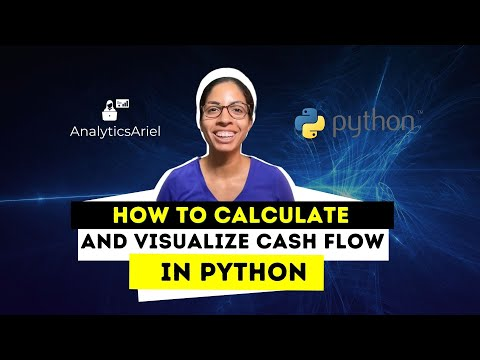

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('Dh09SWvCuiM')

### 2) Zoho Integration
Check out my video below on how to get Zillow property data for ZOHO CRM.

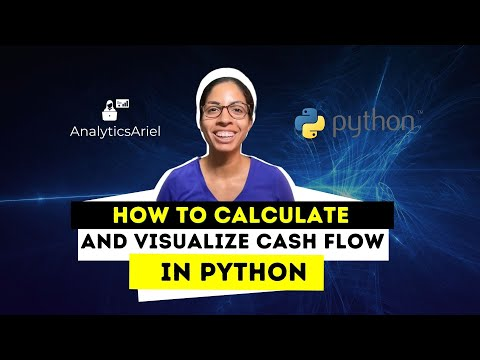

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('Dh09SWvCuiM')

# End Notebook